<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Continuous Probability Distributions

## LEARNING OBJECTIVES
By the end of this lesson, students should be able to:
- Give examples of the following distributions: Continuous Uniform, Exponential, Normal.
- Apply the 68-95-99.7 Rule.
- Calculate and interpret z-scores.
- Describe why the Normal distribution is seen everywhere.
- State the Central Limit Theorem.

## Recap

> “Mathematics, a veritable sorcerer in our computerized society, while assisting the trier of fact in the search for truth, must not cast a spell over him.” – California Supreme Court, People v. Collins (1968)

**Check**: What is a distribution?

**Check**: What is a random variable?

**Check**: What is the difference between a continuous random variable and discrete random variable?

**Check**: Describe these distributions:
- Discrete Uniform
- Bernoulli
- Binomial
- Poisson

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imp

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Continuous Distributions!

## The Continuous Uniform distribution

---

Earlier, we spoke about the [discrete uniform](https://git.generalassemb.ly/DSI-US-4/1.05-lesson-discrete_distributions-statistics/blob/master/discrete_distributions-level1.ipynb) distribution, where each outcome is equally likely.

In cases where we have an uncountably infinite set of outcomes, we might want to use a continuous uniform instead. A continuous uniform distribution is defined over a range.

Parameters of the distribution:

- $a$, the minimum value of the distribution.
- $b$, the maximum value of the distribution.

#### Continuous Uniform pdf

The Continuous Uniform pdf is defined as:

$$ f(x|a,b) = \frac{1}{b-a} $$

One of the most common examples of this is where we want to randomly sample a number between 0 and 1. 

This will be very useful if we want to model some process through random simulations. (You can estimate the value of $\pi$ in this way!)

**Check:** If I randomly sample a value from a Continuous Uniform distribution on the [0,1] interval, what is the probability that the value I randomly sample is between 0.2 and 0.5?

**Check:** Without plotting the continuous uniform, what do I expect the shape of my pdf to be? What about my cdf?

<details><summary>See the answer...</summary>
<li> [here!](http://students.brown.edu/seeing-theory/probability-distributions/index.html#section2)
</details>


## The Exponential distribution

---

Remember that the Binomial distribution is a discrete distribution measuring the **number of successes in a fixed number of events**. If we take the Binomial distribution "to the limit," we get the Poisson distribution, which measures the **number of successes in a fixed amount of time**. 

Well, there's a discrete distribution called the Geometric distribution that models **the number of trials until one success**. Taken to the same limits as above, the Geometric distribution turns into the Exponential distribution, which models **the amount of time until one success**.
- (There was some supplemental material about the Geometric distribution [in earlier's level 2 notes](https://git.generalassemb.ly/DSI-US-4/1.05-lesson-discrete_distributions-statistics/blob/master/extras/discrete_distributions-level2.ipynb).)

So when do we use the Exponential distribution?
- We use the Exponential distribution when we are interested in modeling the amount of time until an event occurs.

Since time is a continuous measure, the Exponential distribution is a continuous distribution.

Parameters of the distribution:

- $\lambda$, the rate of event occurrences.

#### Exponential pdf

The Exponential pdf is defined as:

$$ f(x|\lambda) = \lambda  e^{-\lambda x} $$

In this case, $x$ is the time elapsed.

Given a rate of 10 visitors per hour to our website, how long from now will we expect the next visitor to arrive?

In [2]:
def plot_continuous_pdf(low, high, dist_name='Continuous', xlabel='Time', stats_dist=None, lw=5):
        
    x = np.arange(low, high+1.)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel('Probability Density Function (pdf)', fontsize=16)
    ax.plot(x, stats_dist.pdf(x), color='darkred', lw=lw)
    ax.set_ylim(0, np.max(stats_dist.pdf(x))+0.03)
    
    title = dist_name+'\n'
    plt.title(title, fontsize=20)

    plt.show()

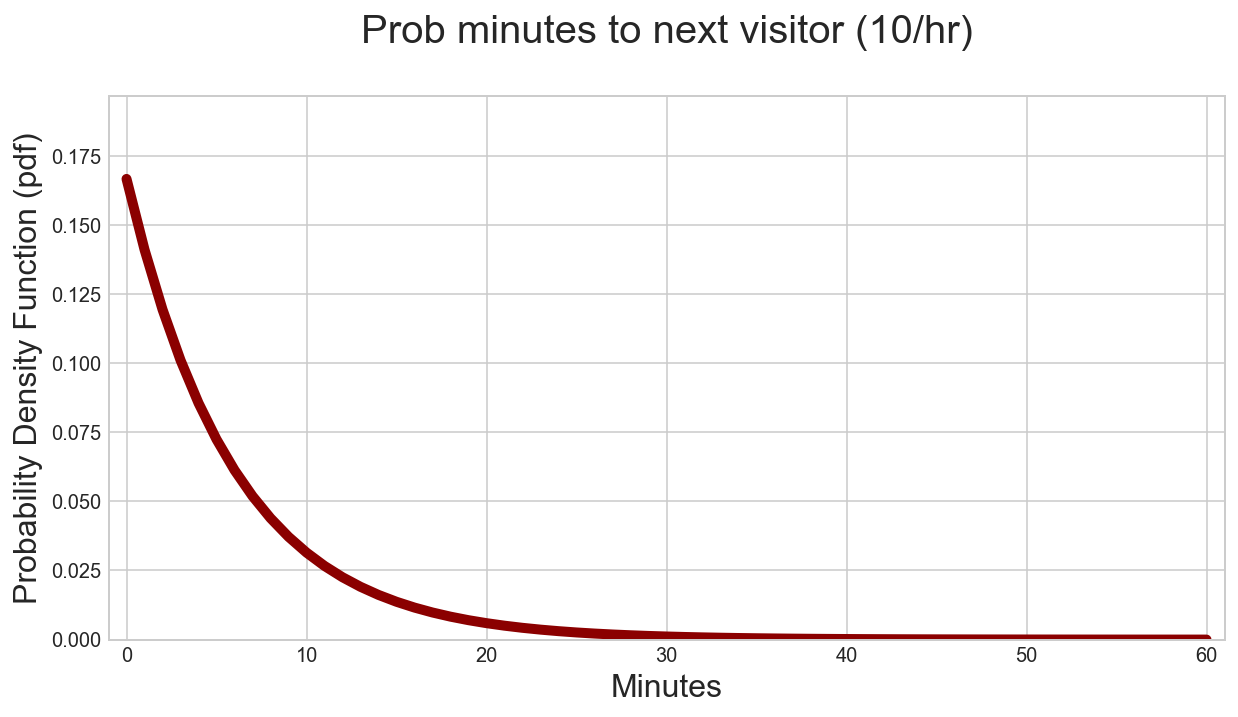

In [7]:
plot_continuous_pdf(low = 0,
                    high = 60,
                    dist_name = 'Prob minutes to next visitor (10/hr)', 
                    stats_dist = stats.expon(scale=6),
                    xlabel = 'Minutes')

#### Exponential cdf

The cumulative distribution function is:

$$ F(x|\lambda) = 1 -  e^{-\lambda x} $$

With the same example, our cumulative distribution function looks like:

In [4]:
def plot_continuous_cdf(low, high, dist_name='Continuous', xlabel='Time', stats_dist=None):
        
    x = np.linspace(low, high+1, 300)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))

    ax.set_ylim(0, 1.1)
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel('Cumulative Distribution Function (cdf)', fontsize=16)
    
    ax.plot(x, stats_dist.cdf(x), lw=4, color='darkblue')

    title = dist_name+'\n'
    plt.title(title, fontsize=20)

    plt.show()

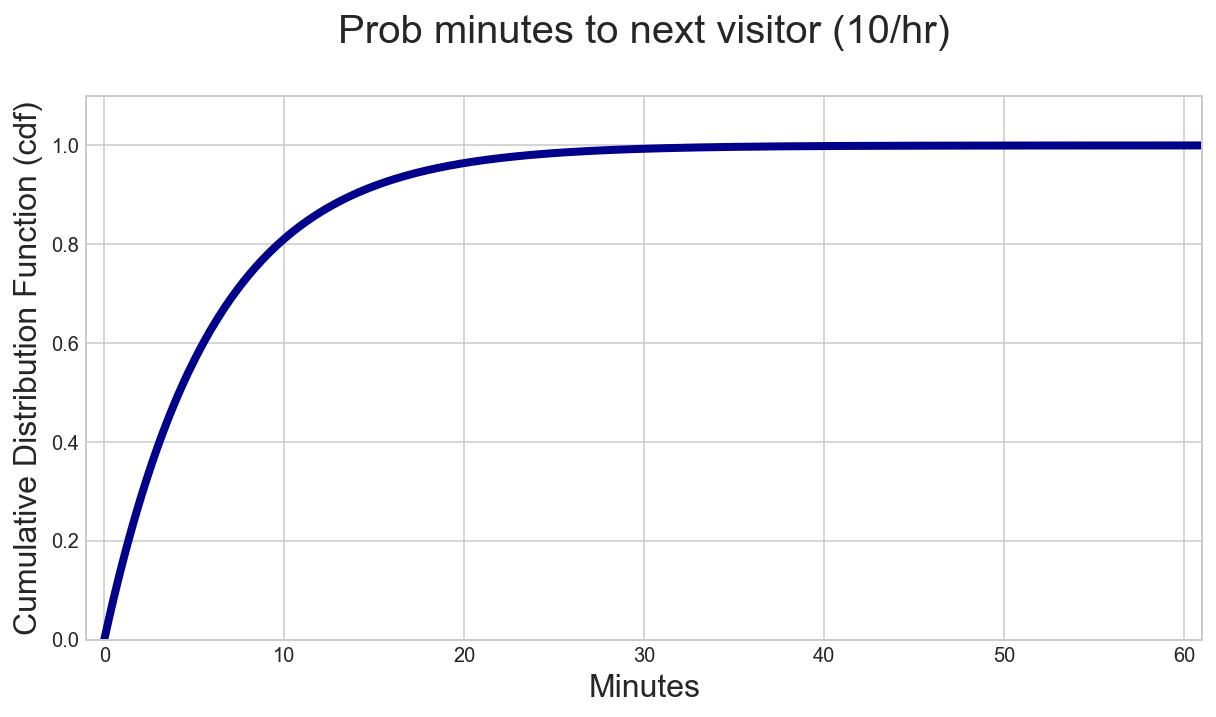

In [5]:
plot_continuous_cdf(low = 0,
                    high = 60,
                    dist_name = 'Prob minutes to next visitor (10/hr)', 
                    stats_dist = stats.expon(scale=6),
                    xlabel='Minutes')

<a id='normal'></a>

## The Normal distribution

---

The Normal distribution is the most well known and most important distribution. **Many** real-world processes can be modeled using a Normal distribution.

Parameters of the Normal distribution:

- $\mu$ is the mean.
- $\sigma$ is the standard deviation of the distribution. (You may also see this parameterized using variance, or $\sigma^2$.)

#### Normal pdf

The probability density function of the Normal distribution is given by

### $$ f(x \; | \; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} } $$

A Normal distribution is parameterized by its mean and variance. (Equivalently, you may see that a Normal distribution is parameterized by its mean and standard deviation.)

Let's return to a Poisson variable example. Say we are measuring the number of users that come to our site. The rate of visitors to our site is 25 per hour. We measure the number of visitors that come to our site over 500 different hours:

In [8]:
visitors = stats.poisson(25).rvs(500)

In [9]:
visitors[0:5]

array([27, 31, 30, 26, 24])

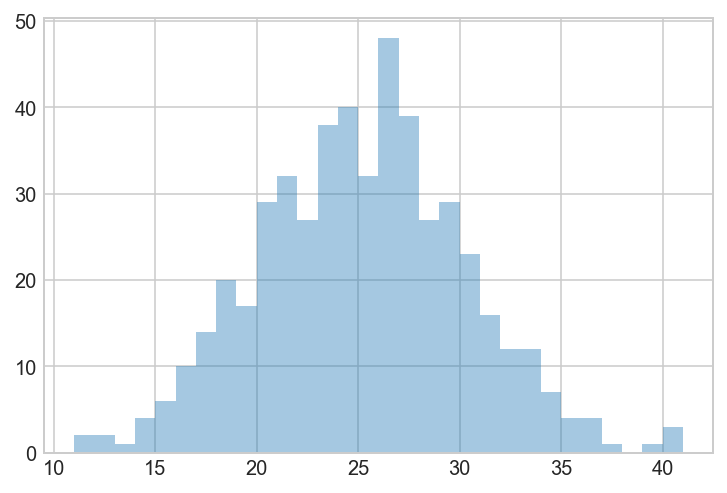

In [12]:
sns.distplot(visitors, bins = 30, kde = False)

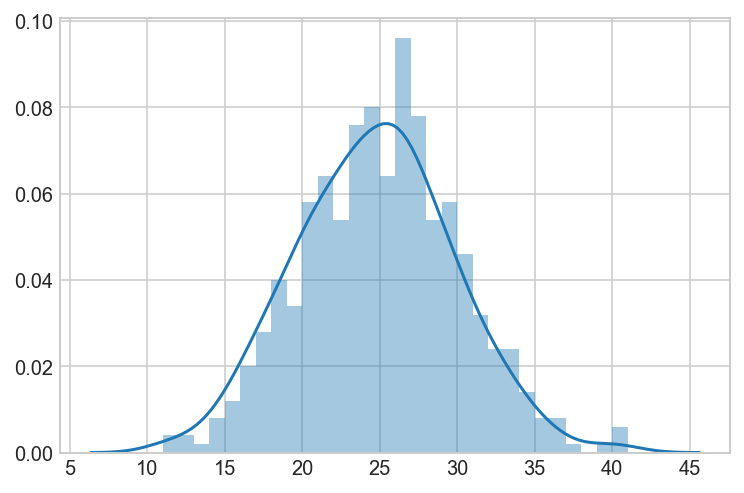

In [13]:
sns.distplot(visitors, bins = 30, kde = True)

If we plot the visitor count histogram for the 500 different hour measurements, we can see that it is normally distributed.

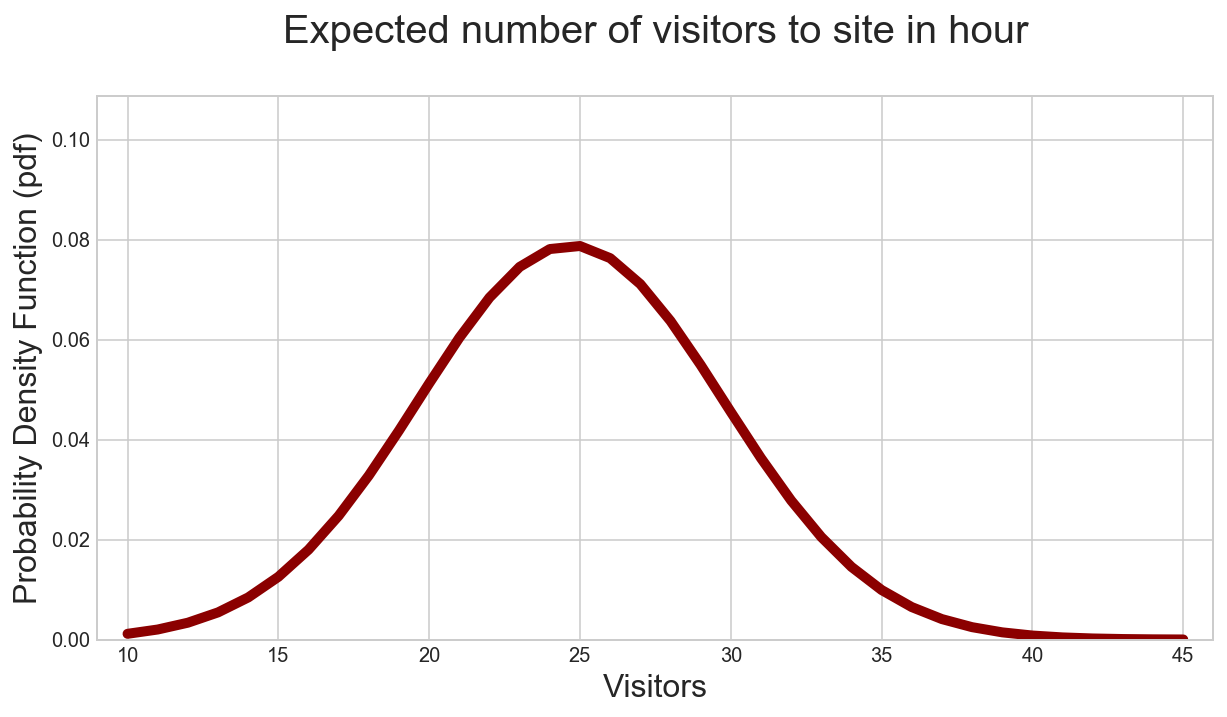

In [14]:
plot_continuous_pdf(10, 45, dist_name='Expected number of visitors to site in hour', 
                    stats_dist=stats.norm(np.mean(visitors), np.std(visitors)), xlabel='Visitors')

#### Normal cdf

[The Normal cumulative distribution function has to be approximated.](https://en.wikipedia.org/wiki/Normal_distribution#Definition) See the wikipedia page for the details on how it is calculated. 

We can plot it here, however, using the scipy module.

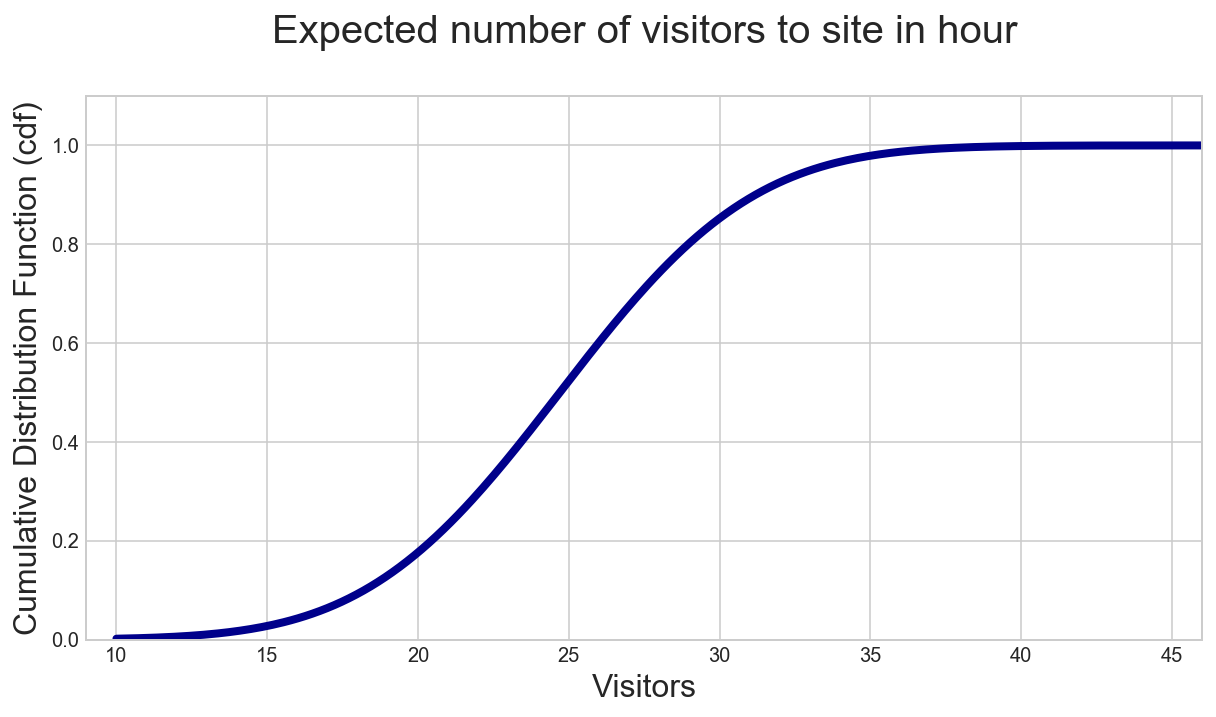

In [15]:
plot_continuous_cdf(10, 45, dist_name='Expected number of visitors to site in hour', 
                    stats_dist=stats.norm(np.mean(visitors), np.std(visitors)), xlabel='Visitors')

## Deep Dive into Normal Distributions

Intelligence Quotient (IQ) follows a Normal distribution by design. IQ is Normally distributed with a mean of 100 and a standard deviation of 15. (We might say $IQ \sim Normal(100,15)$ or $IQ \sim N(100,15)$.)

**Check:** When we discuss distributions, we generally care about three characteristics. What are these three characteristics and how are they reflected in $IQ \sim N(100,15)$?

### The 68-95-99.7 Rule

It is often to our benefit to identify how extreme (or far away from the expected value) a particular observation is within the context of a distribution. For example, an extreme stock price might indicate a major shift in the market and thus might dictate a need to buy or sell. An extreme drop in air pressure might indicate a significant weather event, causing a reaction from the National Weather Service. Quantifying just how extreme a particular observation is from the expected value (a.k.a. population mean) may indicate a particular action we should take.


It is possible to show that, for a Normal distribution:
- 68% of observations from a population will fall within $\mu \pm \sigma$
- 95% of observations from a population will fall within $\mu \pm 2\sigma$
- 99.7% of observations from a population will fall within $\mu \pm 3\sigma$.

**Check:** What percentage of individuals have an IQ between 85 and 115? 

**Check:** What percentage of individuals have an IQ above 100?

**Check:** What percentage of individuals have an IQ between 85 and 130?

### Z-Score
While it's nice to have this 68-95-99.7 rule, let's generalize this to calculate the $z$-score of an observation.

$$ z_i = \frac{x_i - \mu_x}{\sigma_x}$$

This measures how many standard deviations an observation $x_i$ is from the population mean. 

**Check:** Suppose I have an IQ of 120. What is the $z$-score of this observation?

**Check:** Suppose I have an IQ of 75. What is the $z$-score of this observation?

If $X \sim N(\mu,\sigma)$, we can show that $Z \sim N(0,1)$. We call $Z$ the **standard normal distribution** because it has a mean of 0 and standard deviation of 1.

## Let's put some code to this!

Thus far, we've been calling functions that are pre-written for us. Let's create some of our own data and visualize the results.

First, let's import `numpy`.

In [16]:
import numpy as np

In [17]:
data = np.random.uniform(0, 1, size = 5)

In [18]:
data

array([ 0.38178301,  0.84997115,  0.95524078,  0.93950693,  0.20824418])

**Check:** Did you get the same results?

In [19]:
np.random.seed(42)

In [20]:
data = np.random.uniform(0, 1, 5)
data

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848,  0.15601864])

**Check:** Take two minutes to simulate the IQs of 1,000 people. You may find [this](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) helpful.
- If you're stuck, ask a neighbor!
- If you're finished, help a neighbor!

In [21]:
iq = np.random.normal(loc = 100,
                      scale = 15,
                      size = 1000)

In [22]:
iq[0:15]

array([ 104.18561938,  115.15772927,   91.28682799,   92.12245289,
         91.42929751,   86.13875743,   60.81176481,  114.25554524,
        112.24667621,   77.14186004,   93.57930904,   88.86389744,
         89.44984297,   67.90569016,   90.55787559])

Now let's plot these using a package called `seaborn`.

In [23]:
import seaborn as sns

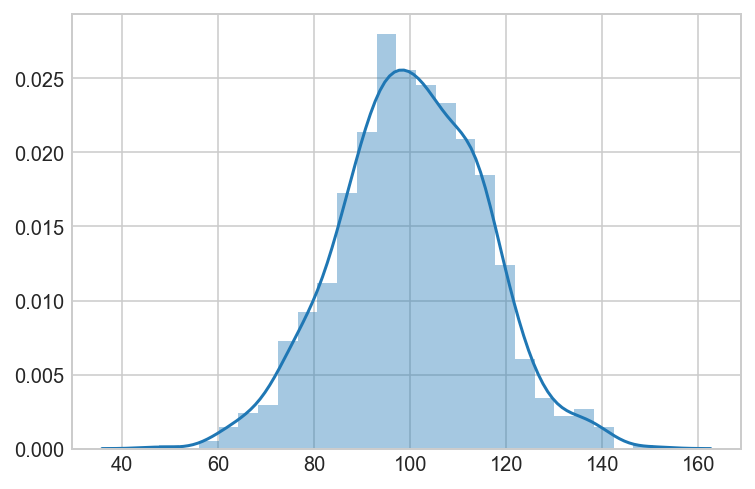

In [24]:
sns.distplot(iq)

In [25]:
iq = np.random.normal(loc = 100,
                      scale = 15,
                      size = 100000)

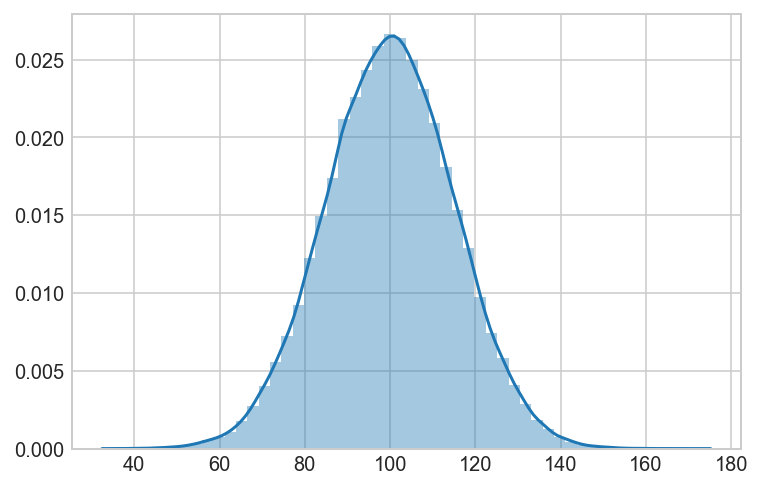

In [27]:
sns.distplot(iq);

**Check:** Why do we expect that sampling 100,000 gets us closer to the "true" distribution than sampling 1,000?

In [34]:
np.random.seed(42)
shoppers = np.random.poisson(lam = 5,
                             size = 20)

In [35]:
shoppers

array([5, 4, 4, 5, 5, 3, 5, 4, 6, 7, 2, 5, 5, 6, 4, 6, 6, 1, 7, 2])

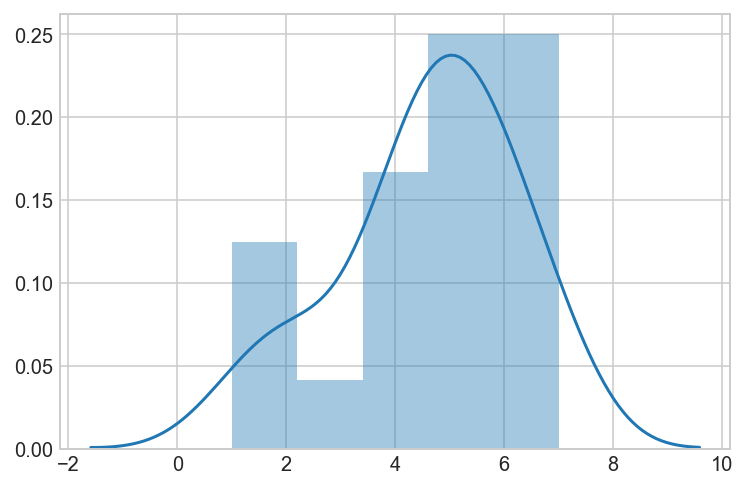

In [36]:
sns.distplot(shoppers);

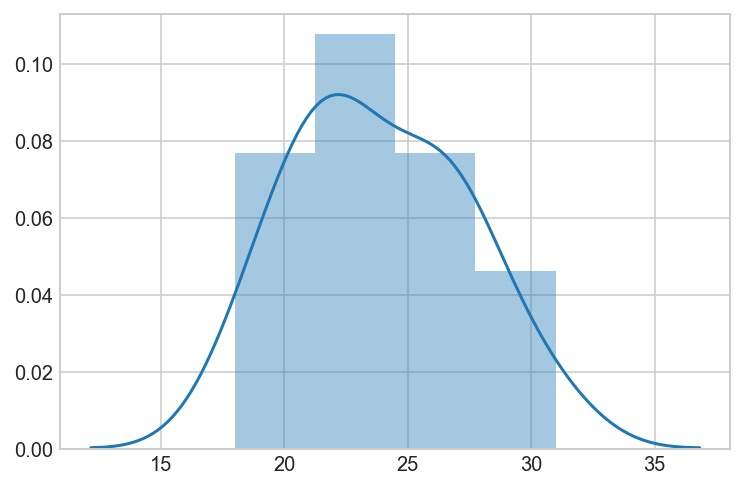

In [37]:
np.random.seed(42)
shoppers = np.random.poisson(lam = 25,
                             size = 20)
sns.distplot(shoppers);

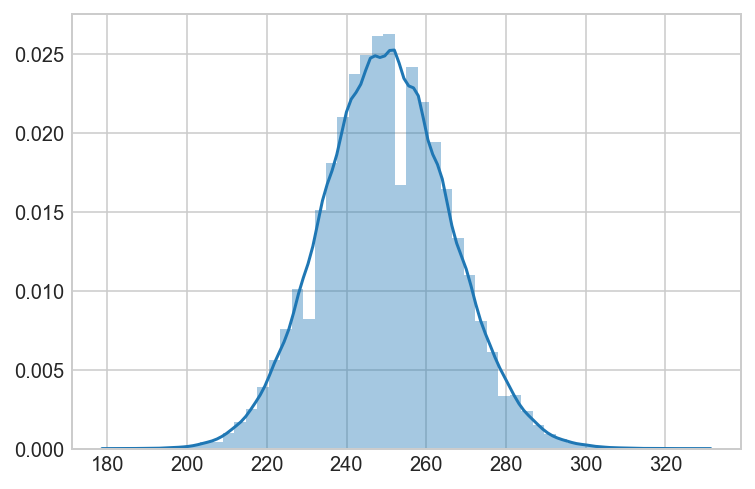

In [41]:
np.random.seed(42)
shoppers = np.random.poisson(lam = 250,
                             size = 200000)
sns.distplot(shoppers);

**Check:** As the $\lambda$ value of our Poisson distribution increases, what do we notice about our histogram?

That's interesting, but Poisson always had that bump. Let's jump back to a distribution that looks really different from a Normal for a minute - a Discrete Uniform. We can roll two dice by using `np.random.randint(1, 7, 2)`.

In [42]:
np.random.randint(1, 7, 2)

array([5, 3])

In [43]:
np.random.randint(1, 7, 2)

array([1, 4])

There are plenty of casino games that ask you to roll two dice, then sum their values. (Perhaps most famous is the game [Craps](https://www.casinotop10.net/craps-rules).)

In [60]:
sum(np.random.randint(1, 7, 2))

5

Simulate 1,000 turns of summing two dice rolls. That is, we want to roll two dice, sum the result, and repeat this 1,000 times.
- Take two minutes to do this.
- Bonus: Do this using a list comprehension!

In [61]:
lst = [sum(np.random.randint(1, 7, 2)) for i in range(1000)]

In [62]:
lst[0:10]

[3, 3, 9, 9, 9, 7, 3, 4, 8, 6]

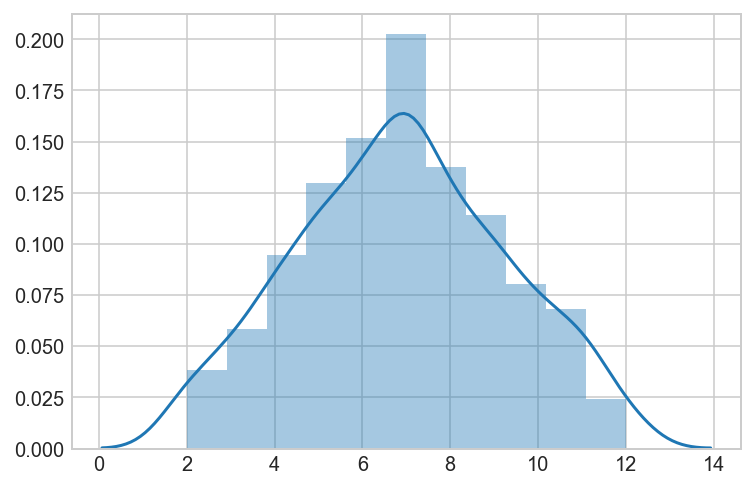

In [68]:
sns.distplot(lst, bins = 11);

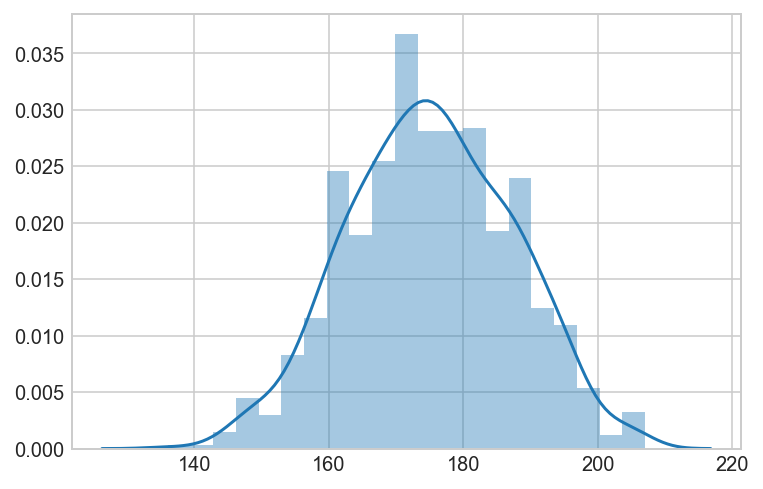

In [66]:
sns.distplot([sum(np.random.randint(1, 7, 50)) for i in range(1000)]);

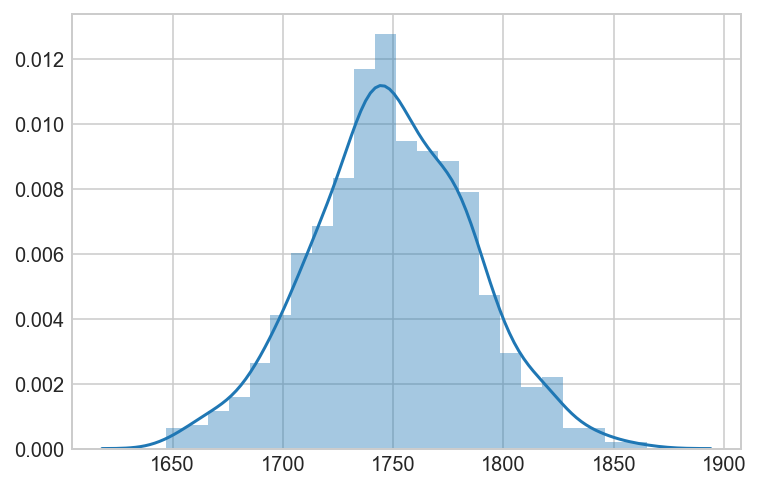

In [67]:
sns.distplot([sum(np.random.randint(1, 7, 500)) for i in range(1000)]);

**This is the Central Limit Theorem at play!**

### Central Limit Theorem

The Normal distribution models the sum of random variables from **any** distribution (if we sum enough random variables).
- Since the mean of random variables is just the sum of random variables divided by a constant, the Normal distribution also models the mean of random variables from **any** distribution (if we take the average of enough random variables).

Remember that $X\sim Poisson(25)$ random variable appeared to look like a Normal distribution.
- The Poisson distribution is just a Binomial distribution taken to some limit.
- The Binomial distribution is just the sum of Bernoulli random variables.
- This means that the Poisson distribution is the sum of Bernoulli random variables.
- **Therefore** the Poisson distribution will closely approximate a Normal distribution if we're summing enough random variables a.k.a. if $\lambda$ is large enough!

**Because of the Central Limit Theorem, the normal distribution appears all over the place.** This is good! Normality is the most common assumption we'll make about the distribution of our data. Normality underlies many of the inferential techniques that we seek to use. It is important for us to determine when Normality is a condition we've met.

### Stating the CLT.

Consider the random variable $X$. 
- We can take a sample of size $n$ from this population and call it $S_1$. We calculate the mean of $S_1$ and call that $\bar{x}_1$.
- Let's take another sample of size $n$ from the population and call this sample $S_2$. We calculate the mean of $S_2$ and call that $\bar{x}_2$.
- Theoretically, we can do this over and over until we've calculated the mean of every possible sample of size $n$ so that we have a list [$\bar{x}_1$, $\bar{x}_2$, $\ldots$, $\bar{x}_n$].
- If we plot that list, we've now plotted every possible value of the sample mean $\bar{x}$ and we observe how frequently each value occurs.
    - **This is the sampling distribution of the sample mean!**

**The Central Limit Theorem states that, as $n \rightarrow \infty$, the distribution of $\bar{X}$ approaches a Normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.**

* If $X \sim N(\mu,\sigma)$, then $\bar{X}$ is exactly $N\left(\mu,\frac{\sigma}{\sqrt{n}}\right)$.
* If $X$ is not Normally distributed (or is unknown), then $\bar{X}$ is approximately $N\left(\mu,\frac{\sigma}{\sqrt{n}}\right)$ if the sample size $n$ is at least 30.

#### Why do we care?
If $\bar{X}$ is Normally distributed, then we know how $\bar{X}$ behaves and that the sample mean was drawn from a Normal distribution. We can then use the sample mean to **conduct inference** on the population mean!

## LEARNING OBJECTIVES
By the end of this lesson, students should be able to:
- Give examples of the following distributions: Continuous Uniform, Exponential, Normal.
- Apply the 68-95-99.7 Rule.
- Calculate and interpret z-scores.
- Describe why the Normal distribution is seen everywhere.
- State the Central Limit Theorem.

<details><summary>What is the Continuous Uniform distribution?</summary>
<li> The Continuous Uniform distribution is a distribution that takes on an uncountable number of values with equal probability.
<li> An example of the Continuous Uniform might be:
<ul>
<li> Randomly generate a number between 0 and 1.
</ul>
</details>
<br>
<details><summary>What is the Exponential distribution?</summary>
<li> Just like the Poisson distribution is the Binomial distribution taken to the limit, the Exponential distribution is the Geometric distribution taken to the limit. The Exponential distribution models the amount of time until an event occurs.
<li> Examples of the Exponential distribution might be:
<ul>
<li> The amount of time until a light bulb stops working.
<li> The amount of time until a bus arrives at the stop.
</ul>
</details>
<br>
<details><summary>What is the Normal distribution?</summary>
<li> The Normal distribution is the most widely-known distribution. It is symmetric, bell-shaped, and is parameterized by its mean and variance/standard deviation.
<li> Examples of the Normal distribution might be:
<ul>
<li> The intelligence quotient (IQ) of individuals.
<li> The average values of 1,000 dice rolls.
</ul>
</details>
<br>
<details><summary>What is the 68-95-99.7 Rule?</summary>
<li> When working with a Normal distribution, we know that 68% of observations will fall within $\pm 1 \sigma$ of $\mu$, 95% of observations will fall within $\mu \pm 2 \sigma$, and 99.7% of observations will fall within $\mu \pm 3 \sigma$. This makes it easy to quickly identify potential outliers, for example.
</details>
<br>
<details><summary>How do you calculate the $z$-score of an observation?</summary>
<li> If an observation $x_i$ comes from a distribution (or set of data) with mean $\mu_X$ and standard deviation $\sigma_X$, then its $z$-score is given by $z_i = \frac{x_i - \mu_X}{\sigma_X}$.
</details>
<br>
<details><summary>How do you interpret the $z$-score of an observation?</summary>
<li> The $z$-score of an observation tells us how far away that observation is from the expected value (mean) of that variable.
</details>
<br>
<details><summary>Why is the Normal distribution seen everywhere?</summary>
<li> The Normal distribution naturally models a lot of real-world phenomena. However, the Normal distribution also models the sum of **any** random variables and the mean of **any** random variables. We often count or average things, so this will pop up frequently. In addition, some distributions naturally are means/sums of other random variables (Poisson, Binomial, and lots of others we haven't officially discussed) so we can use the Normal distribution in lots of cases!
</details>
<br>
<details><summary>State the Central Limit Theorem.</summary>
<li> The Central Limit Theorem states that, as $n \rightarrow \infty$, the sampling distribution of $\bar{X}$ will approach a Normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.
</details>

### Resources
- The [Kolmogorov-Smirnov test](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html) is a way for us to estimate whether two samples come from the same distribution or whether one sample comes from a particular distribution. (This will make more sense after you've covered hypothesis testing in inference.)